In [2]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=0601e8c7d268f535471e3a381bcb21d4a1aabe6f50b5f76c9014cf9688d68336
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [39]:
import yfinance as yf

amd = yf.Ticker("AMD")
amd_hist_train = amd.history(start="2016-01-01", end="2020-01-01")
amd_hist_test = amd.history(start="2020-01-01", end="2021-01-01")

In [78]:
train_data = amd_hist_train.drop(columns=["Dividends", "Stock Splits"])
test_data = amd_hist_test.drop(columns=["Dividends", "Stock Splits"])

train_data = amd_hist_train[["Open"]]
test_data = amd_hist_test[["Open"]]

train_data

,Open
Date,
2016-01-04,2.770000
2016-01-05,2.770000
2016-01-06,2.660000
2016-01-07,2.430000
2016-01-08,2.360000
...,...
2019-12-24,46.099998
2019-12-26,46.990002
2019-12-27,46.849998


In [79]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

train_scaled = sc.fit_transform(train_data)
test_scaled = sc.transform(test_data)

In [80]:
import numpy as np
# à partir de 1000 lignes, crée 940 groupes de 60 lignes qui se suivent
def create_60_days_data(data):
  X = []
  y = []
  for i in range(60, len(data)):
      X.append(data[i-60:i, 0])
      y.append(data[i, 0])
  X, y = np.array(X), np.array(y)
  X = np.reshape(X, (X.shape[0], X.shape[1], 1))
  return X, y

X_train, y_train = create_60_days_data(train_scaled)
X_test, y_test = create_60_days_data(test_scaled)

In [81]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)


Epoch 1/20
30/30 [==============================] - 11s 122ms/step - loss: 0.0452
Epoch 2/20
30/30 [==============================] - 4s 122ms/step - loss: 0.0092
Epoch 3/20
30/30 [==============================] - 4s 125ms/step - loss: 0.0089
Epoch 4/20
30/30 [==============================] - 4s 125ms/step - loss: 0.0086
Epoch 5/20
30/30 [==============================] - 4s 123ms/step - loss: 0.0070
Epoch 6/20
30/30 [==============================] - 4s 123ms/step - loss: 0.0071
Epoch 7/20
30/30 [==============================] - 4s 122ms/step - loss: 0.0064
Epoch 8/20
30/30 [==============================] - 4s 123ms/step - loss: 0.0058
Epoch 9/20
30/30 [==============================] - 4s 123ms/step - loss: 0.0067
Epoch 10/20
30/30 [==============================] - 4s 122ms/step - loss: 0.0056
Epoch 11/20
30/30 [==============================] - 4s 123ms/step - loss: 0.0061
Epoch 12/20
30/30 [==============================] - 4s 123ms/step - loss: 0.0057
Epoch 13/20
30/30 [=====

In [100]:
import matplotlib.pyplot as plt

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

real_stock_price = test_data["Open"].values
real_stock_price = real_stock_price[60:]
real_stock_price

array([47.24000168, 47.93000031, 44.18000031, 43.40000153, 44.29999924,
       44.29999924, 48.95999908, 48.06999969, 49.65000153, 48.47000122,
       52.24000168, 53.72999954, 55.95999908, 57.34999847, 55.97999954,
       56.90000153, 54.90999985, 56.65000153, 55.09999847, 57.43999863,
       57.15999985, 54.52999878, 53.43000031, 51.06999969, 49.81999969,
       53.43000031, 52.41999817, 52.93000031, 52.15000153, 52.90000153,
       56.20999908, 54.04000092, 52.09999847, 53.31999969, 54.97999954,
       54.38999939, 56.54999924, 56.68000031, 54.77000046, 56.00999832,
       53.27000046, 52.25      , 52.06999969, 53.31000137, 53.45000076,
       53.59999847, 52.59000015, 52.99000168, 53.29999924, 52.95000076,
       57.20000076, 55.93999863, 55.00999832, 52.58000183, 55.72000122,
       54.79000092, 54.61999893, 54.40999985, 54.66999817, 55.04999924,
       53.93999863, 52.56000137, 51.84999847, 50.15000153, 51.15999985,
       52.63000107, 53.02999878, 52.90000153, 53.27999878, 53.00

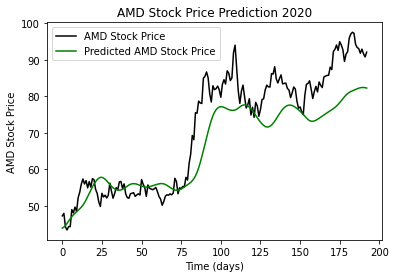

In [103]:
plt.plot(real_stock_price, color = 'black', label = 'AMD Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AMD Stock Price')
plt.title('AMD Stock Price Prediction 2020')
plt.xlabel('Time (days)')
plt.ylabel('AMD Stock Price')
plt.legend()
plt.show()